In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [93]:
df_train = pd.read_csv("./train.csv")

In [3]:
df_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
330,331,90,RL,NaN,10624,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,119000
366,367,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,159000
721,722,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,143000
326,327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,Con,Normal,324000
401,402,20,RL,65.0,8767,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,164990
361,362,50,RL,NaN,9144,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,145000
192,193,20,RL,68.0,9017,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,192000
312,313,190,RM,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal,119900
418,419,50,RL,60.0,8160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,AdjLand,126000
181,182,70,RL,54.0,7588,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,200100


In [4]:
df_train.columns
#gets names of all the variables (features of house)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train.shape
#81 variables, 1460 observations)

(1460, 81)

In [8]:
df_train['SalePrice'].describe()
#taking a look at the SalesPrice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

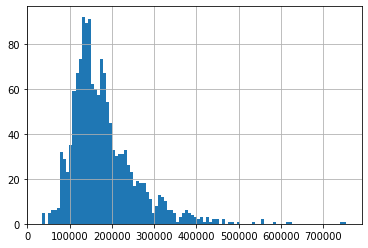

In [15]:
df_train['SalePrice'].hist(bins=100)
#plot a histogram of the saleprice, looks left skewed

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


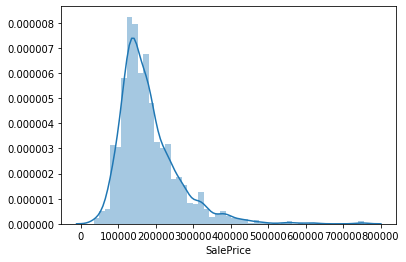

In [22]:
sns.distplot(df_train['SalePrice'])
print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")
#use sns to plot a better looking plot

In [24]:
# Histogram of sales price is skewed right
log_sales = np.log(df_train['SalePrice'])

Skewness: 0.12133506220520406
Kurtosis: 0.8095319958036296


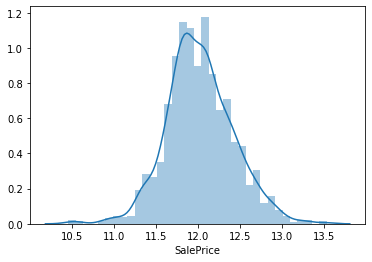

In [27]:
sns.distplot(log_sales)
print(f"Skewness: {log_sales.skew()}")
print(f"Kurtosis: {log_sales.kurt()}")
#plot the log_sales to make a less skew, more normal

In [57]:
df_train.corr().abs().sort_values('SalePrice', ascending=False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,0.021917,0.084284,0.351799,0.263843,0.790982,0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,0.128578,0.044584,0.111447,0.092404,0.021190,0.046432,0.028923,1.000000
OverallQual,0.028365,0.032628,0.251646,0.105806,1.000000,0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,0.002416,0.050240,0.036526,0.708624
GarageCars,0.016570,0.040110,0.285691,0.154871,0.600671,0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,0.151434,0.035765,0.050494,0.020934,0.043080,0.040522,0.039117,0.640409
GarageArea,0.017634,0.098672,0.344997,0.180403,0.562022,0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,0.121777,0.035087,0.051412,0.061047,0.027400,0.027974,0.027378,0.623431
TotalBsmtSF,0.015415,0.238518,0.392075,0.260833,0.537808,0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,0.095478,0.037384,0.084489,0.126053,0.018479,0.013196,0.014969,0.613581
1stFlrSF,0.010496,0.251758,0.457181,0.299475,0.476224,0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,0.065292,0.056104,0.088758,0.131525,0.021096,0.031372,0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,0.115093,0.035353,0.008106,0.049604,0.014290,0.055872,0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,0.006683,0.059383,0.083757,0.024763,0.036907,0.034516,0.533723
YearBuilt,0.012713,0.027850,0.123349,0.014228,0.572323,0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,0.387268,0.031355,0.050364,0.004950,0.034383,0.012398,0.013618,0.522897


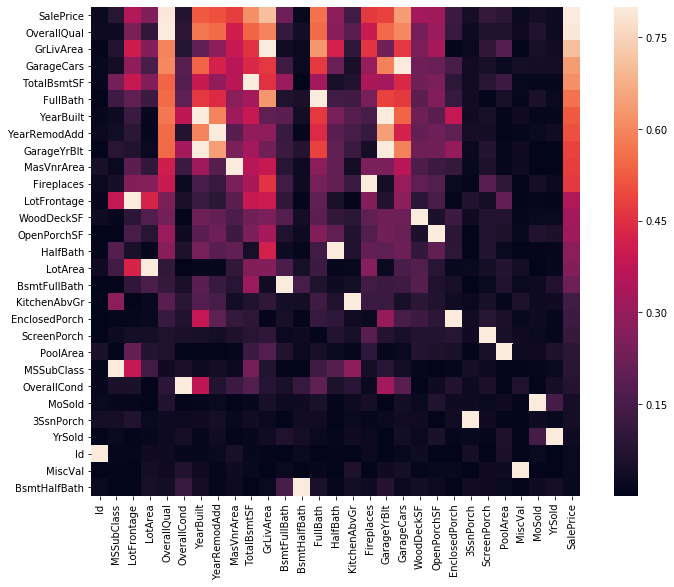

In [64]:
corrmat = df_train.corr().abs().sort_values('SalePrice', ascending=False)
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [61]:
#looking at the last column for the highest correlation of variables to saleprice
#OverallQual, GrLivArea, GarageCars, TotalBsmtFG, FullBath, YearBuilt, YearRemodAdd, GaragaeYrBlt has highest correlation



In [76]:
total_missing = df_train.isnull().sum().sort_values(ascending=False)
percent_missing = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total_missing, percent_missing], axis=1, keys=['Total','Percent'])
missing_values.head(20)
#gives a table of the total missing values and the percent


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageFinish,81,0.055479
GarageYrBlt,81,0.055479
GarageType,81,0.055479
GarageQual,81,0.055479


In [195]:
df_train_cleaned = df_train.drop((missing_values[missing_values['Total'] >= 1]).index,1)
#drop all columns missing >=1 missing values
df_train_cleaned.shape


(1460, 62)

In [196]:
df_train_cleaned.isnull().sum().max()
#0 means there is no more missing data

0

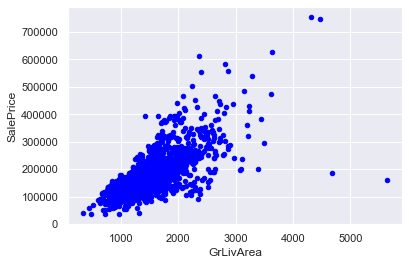

In [197]:
df_train_cleaned.plot.scatter(x = 'GrLivArea',
                          y = 'SalePrice',
                             c='Blue')

In [198]:
#above shows 4 data points that extremes, we will remove the bottom right 2, and keep the top left 2 since they seems to be following the trend
df_train_cleaned.loc[df_train_cleaned['GrLivArea']>4000]
df_train_cleaned = df_train_cleaned.drop(df_train_cleaned[df_train_cleaned['Id']==524].index)
df_train_cleaned = df_train_cleaned.drop(df_train_cleaned[df_train_cleaned['Id']==1299].index)
df_train_cleaned.loc[df_train_cleaned['GrLivArea']>4000]
#checking to see the 2 rows are removed



,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000


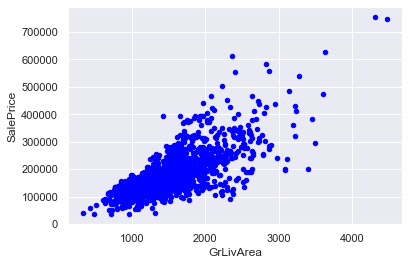

In [199]:
df_train_cleaned.plot.scatter(x = 'GrLivArea',
                          y = 'SalePrice',
                             c='Blue')

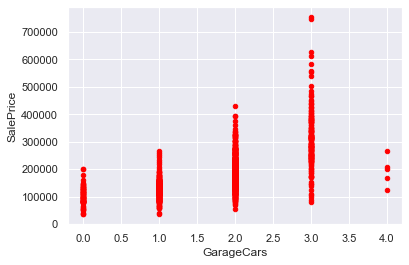

In [107]:
df_train_cleaned.plot.scatter(x = 'GarageCars',
                          y = 'SalePrice',
                             c='Red')

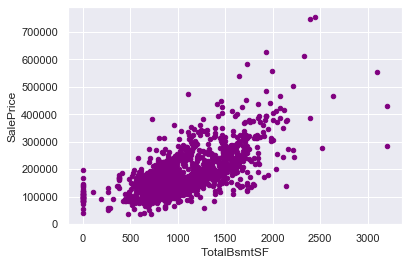

In [204]:
df_train_cleaned.plot.scatter(x = 'TotalBsmtSF',
                          y = 'SalePrice',
                             c='Purple')

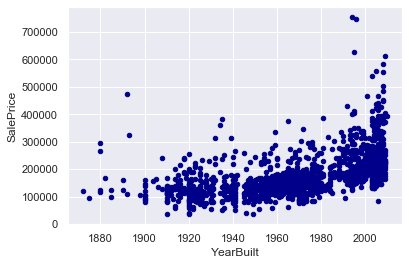

In [205]:
df_train_cleaned.plot.scatter(x = 'YearBuilt',
                          y = 'SalePrice',
                             c='DarkBlue')

In [207]:
df_train_cleaned['SalePrice'].describe()
#taking a look at the cleaned data set price

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

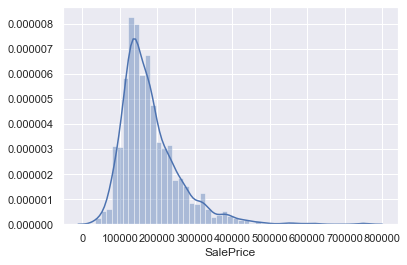

In [208]:
sns.distplot(df_train_cleaned['SalePrice'])

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

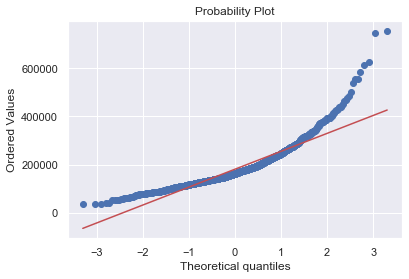

In [209]:
stats.probplot(df_train_cleaned['SalePrice'], plot=plt)

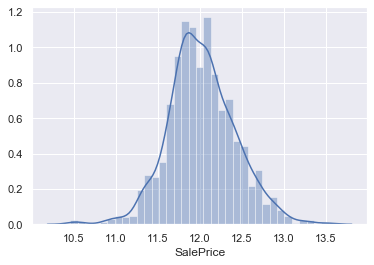

In [210]:
sns.distplot(np.log(df_train_cleaned['SalePrice']))

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3985320692976512, 12.024008660964794, 0.9953918648311367))

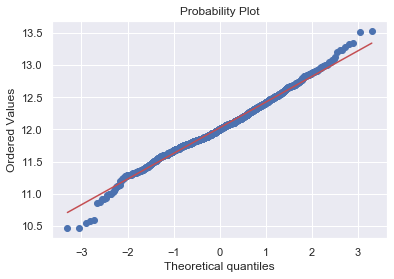

In [211]:
stats.probplot(np.log(df_train_cleaned['SalePrice']), plot=plt)

In [212]:
df_train_cleaned['log_SalePrice'] = np.log(df_train_cleaned['SalePrice'])

In [214]:
df_train_cleaned.sample(20)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
570,571,90,RL,13101,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,11,2008,WD,Normal,142600,11.867799
991,992,70,RM,17671,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,11,2009,WD,Normal,168000,12.031719
615,616,85,RL,8800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,5,2010,WD,Abnorml,137500,11.831379
121,122,50,RM,6060,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,6,2007,WD,Normal,100000,11.512925
724,725,20,RL,13286,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2009,WD,Normal,320000,12.676076
1443,1444,30,RL,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,40,0,0,5,2009,WD,Normal,121000,11.703546
496,497,20,RL,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,5,2007,WD,Normal,430000,12.971540
916,917,20,C (all),9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,10,2006,WD,Abnorml,35311,10.471950
714,715,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,3,2010,WD,Normal,130500,11.779129
398,399,30,RM,8967,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,11,2007,WD,Abnorml,67000,11.112448
